<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 13.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-04-19 09:37:00
-------------------
qualified stocks: 91
with latest results: 85
still star stocks: 47
-------------------
Initial Investment:  1.09 C
CY Investment:  1.36 C
Reserve:  3.00 K
Current:  1.16 C
-------------------
Today PnL: 1.20 L (1.04%)
Current PnL: -19.72 L (-14.5%)
CY Booked + Current PnL: -19.43 L (-14.29%)
-------------------
Total profit:  4.75 L
Total loss:  -24.47 L
-------------------
Total Booked + Current PnL: 7.55 L (6.92%)
Total Booked PnL: 27.27 L (25.01%)
Curr Year Booked PnL: 28.87 K (0.25%)
Prev Year Booked PnL: 26.98 L (24.74%)
Est FTT:  1.94 C
Est FTT PnL: 77.57 L (66.65%)
-------------------
Est LTT:  2.54 C
Est LTT PnL: 1.38 C (118.4%)
Deployed:  1.09 C
Current:  1.16 C
CAGR/XIRR %: 4.68%
Row successfully appended and saved to data/myPortfolioDB.csv.


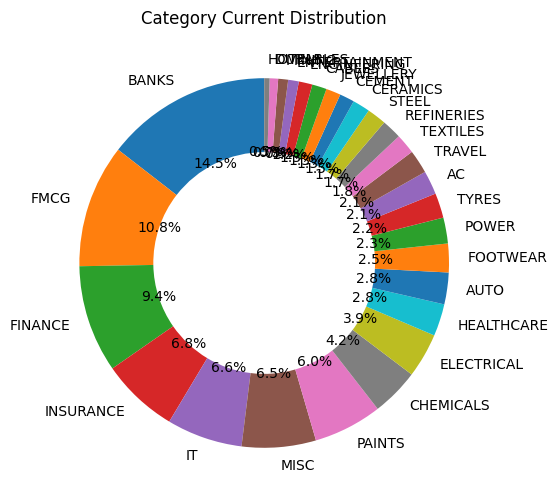

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
11,AXISBANK,1003.18,1317.30,-13.25,H-LC,76.92,145278.0,22890.0,15429.0,2.54,...,10.62,31.31,NaN,1.48,1.25,25.60,X40,ATH,LC,BANKS
70,SBIN,760.30,863.00,-18.70,M-LC,48.35,211324.0,9844.0,17371.0,3.33,...,8.22,13.51,93.0,0.57,1.82,15.77,XY25,NTT,LC,BANKS
54,NMDC,65.62,82.00,34.24,M-MC,29.67,100781.0,382.0,24681.0,0.20,...,24.49,24.96,507.0,0.02,0.87,13.59,XY25,NTT,MC,MINING
69,SBILIFE,1496.49,1924.99,-9.05,H-LC,61.54,135089.0,9384.0,26613.0,2.73,...,19.70,28.63,NaN,0.35,1.16,20.35,AR,ATH,LC,INSURANCE
35,HINDUNILVR,2430.78,2723.00,-17.01,X-LC,45.05,199500.0,-4686.0,29227.0,0.35,...,14.65,12.02,-3.0,-0.16,1.71,10.09,XY25,NTT,LC,FMCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,REPCOHOME,515.07,880.00,-13.82,H-SC,96.70,158523.0,-46475.0,191718.0,5.89,...,120.94,70.85,-44.0,-0.24,1.36,27.97,XY24,NTT,SC,FINANCE
64,SAIL,130.64,228.00,72.16,M-MC,32.97,196239.0,-28723.0,196376.0,-1.16,...,100.07,74.53,-18.0,-0.15,1.69,13.94,XY24,BTT,MC,STEEL
59,RBLBANK,230.61,388.00,-13.25,M-SC,87.91,186578.0,-47722.0,207624.0,0.48,...,111.28,68.25,-48.0,-0.23,1.60,22.87,XY24,NTT,SC,BANKS
12,BANDHANBNK,214.25,400.00,-32.01,H-SC,75.82,184196.0,-64334.0,279812.0,0.24,...,151.91,86.70,-29.0,-0.23,1.58,21.86,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
35,HINDUNILVR,2430.78,2723.00,-17.01,X-LC,45.05,199500.0,-4686.0,29227.0,0.35,...,14.65,12.02,-3.0,-0.16,1.71,10.09,XY25,NTT,LC,FMCG
52,NESTLEIND,2225.87,2755.00,-12.53,X-LC,52.75,219911.0,17357.0,30788.0,1.40,...,14.00,23.77,NaN,0.56,1.89,13.13,XY25,NTT,LC,FMCG
55,PIDILITIND,2482.94,3576.00,-12.70,X-LC,50.55,175989.0,31978.0,31414.0,0.26,...,17.85,44.02,10.0,1.02,1.51,14.16,X40,BTT,LC,CHEMICALS
50,MEDANTA,1022.60,1486.00,10.49,X-MC,36.26,192903.0,37468.0,32967.0,-2.02,...,17.09,45.32,8.0,1.14,1.66,31.25,XY24,NTT,MC,HEALTHCARE
33,HDFCBANK,1541.80,2170.00,3.67,X-LC,57.14,244058.0,46708.0,33704.0,1.53,...,13.81,40.74,4.0,1.39,2.10,33.52,X40,BTT,LC,BANKS
25,DMART,3499.95,5112.00,-15.48,X-LC,68.13,204784.0,40286.0,35489.0,3.21,...,17.33,46.06,33.0,1.14,1.76,28.00,AR,NTT,LC,FMCG
32,HAVELLS,1571.40,2077.12,3.96,X-LC,60.44,140911.0,5771.0,37722.0,1.52,...,26.77,32.18,NaN,0.15,1.21,16.45,X40,ATH,LC,ELECTRICAL
16,BRITANNIA,4905.19,6446.05,10.67,X-LC,81.32,218184.0,21976.0,39666.0,0.71,...,18.18,31.41,239.0,0.55,1.88,19.22,AR,ATH,LC,FMCG
61,RELIANCE,1288.53,1526.00,-5.75,X-LC,24.18,201371.0,-2217.0,39730.0,2.84,...,19.73,18.43,67.0,-0.06,1.73,9.69,XY25,NTT,LC,REFINERIES
20,CERA,9059.90,10420.45,-25.54,X-SC,54.95,56560.0,-34039.0,47646.0,-0.45,...,84.24,15.02,-57.0,-0.71,0.49,11.29,X40N,ATH,SC,CERAMICS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.0,-18.70,M-LC,48.35,211324.0,9844.0,17371.0,3.33,...,8.22,13.51,93.0,0.57,1.82,15.77,XY25,NTT,LC,BANKS
54,NMDC,65.62,82.0,34.24,M-MC,29.67,100781.0,382.0,24681.0,0.20,...,24.49,24.96,507.0,0.02,0.87,13.59,XY25,NTT,MC,MINING
35,HINDUNILVR,2430.78,2723.0,-17.01,X-LC,45.05,199500.0,-4686.0,29227.0,0.35,...,14.65,12.02,-3.0,-0.16,1.71,10.09,XY25,NTT,LC,FMCG
46,LICI,761.77,983.0,-20.75,H-LC,37.36,131725.0,6795.0,29493.0,0.70,...,22.39,29.04,202.0,0.23,1.13,10.15,XY25,NTT,LC,INSURANCE
52,NESTLEIND,2225.87,2755.0,-12.53,X-LC,52.75,219911.0,17357.0,30788.0,1.40,...,14.00,23.77,NaN,0.56,1.89,13.13,XY25,NTT,LC,FMCG
50,MEDANTA,1022.60,1486.0,10.49,X-MC,36.26,192903.0,37468.0,32967.0,-2.02,...,17.09,45.32,8.0,1.14,1.66,31.25,XY24,NTT,MC,HEALTHCARE
67,SBICARD,765.91,1075.0,-3.17,H-MC,35.16,212992.0,33003.0,39638.0,1.99,...,18.61,40.36,-1.0,0.83,1.83,36.94,XY24,NTT,MC,FINANCE
61,RELIANCE,1288.53,1526.0,-5.75,X-LC,24.18,201371.0,-2217.0,39730.0,2.84,...,19.73,18.43,67.0,-0.06,1.73,9.69,XY25,NTT,LC,REFINERIES
86,UNIONBANK,123.87,163.0,-10.47,M-LC,64.84,143933.0,3093.0,41395.0,-0.53,...,28.76,31.59,-39.0,0.07,1.24,25.03,XY24,NTT,LC,BANKS
15,BERGEPAINT,558.54,680.0,-21.37,H-MC,39.56,172321.0,-4736.0,43235.0,0.29,...,25.09,21.75,-14.0,-0.11,1.48,23.27,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
69,SBILIFE,1496.49,1924.99,-9.05,H-LC,61.54,135089.0,9384.0,26613.0,2.73,...,19.70,28.63,NaN,0.35,1.16,20.35,AR,ATH,LC,INSURANCE
25,DMART,3499.95,5112.00,-15.48,X-LC,68.13,204784.0,40286.0,35489.0,3.21,...,17.33,46.06,33.0,1.14,1.76,28.00,AR,NTT,LC,FMCG
19,CAMS,3643.00,5250.99,-2.21,H-SC,65.93,108710.0,6706.0,38320.0,-0.31,...,35.25,44.14,261.0,0.18,0.93,27.19,XR,ATH,SC,MISC
49,MASFIN,326.60,399.50,-27.06,H-SC,62.64,81420.0,-16560.0,38430.0,2.31,...,47.20,22.32,-74.0,-0.43,0.70,18.09,XR,ATH,SC,FINANCE
16,BRITANNIA,4905.19,6446.05,10.67,X-LC,81.32,218184.0,21976.0,39666.0,0.71,...,18.18,31.41,239.0,0.55,1.88,19.22,AR,ATH,LC,FMCG
51,MRF,113820.50,150504.14,10.87,X-MC,91.21,252950.0,25309.0,48060.0,1.59,...,19.00,32.23,NaN,0.53,2.17,23.20,AR,ATH,MC,TYRES
83,TRIDENT,37.35,48.00,44.53,M-SC,67.03,67382.0,-24872.0,51177.0,0.89,...,75.95,28.51,-16.0,-0.49,0.58,13.57,XR,NTT,SC,TEXTILES
38,INDUSINDBK,1354.50,1800.00,-38.53,H-MC,84.62,45298.0,-31908.0,57302.0,0.82,...,126.50,32.89,-21.0,-0.56,0.39,24.75,XR,NTT,MC,BANKS
45,LAOPALA,369.40,464.00,-23.84,H-SC,70.33,64190.0,-36656.0,62483.0,3.90,...,97.34,25.61,-50.0,-0.59,0.55,15.77,AR,NTT,SC,CERAMICS
13,BANKINDIA,112.90,190.00,-25.80,M-MC,95.60,103985.0,3730.0,64731.0,1.40,...,62.25,68.29,-12.0,0.06,0.89,29.61,XR,NTT,MC,BANKS


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.97
1,20,34.92
2,30,48.20


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,39.75
X40,13.49
AR,13.10
X40N,12.96
XY25,9.15
XR,9.13
SR,1.28
X200,1.08


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,20.46
H-SC,18.70
M-SC,17.52
H-MC,7.78
M-MC,7.70
H-LC,7.64
M-LC,6.77
X-MC,6.40
X-SC,2.77


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.94
          M-SC          8.79
X40       X-LC          8.64
XY24      H-MC          6.18
XY25      X-LC          5.33
XY24      M-MC          5.26
X40N      H-SC          5.04
XY24      M-LC          4.95
AR        X-LC          4.24
X40N      M-SC          3.95
XR        H-SC          3.25
X40       H-LC          2.88
XR        M-SC          2.81
AR        H-LC          2.36
          X-MC          2.17
XY25      M-LC          1.82
XY24      X-MC          1.66
AR        H-SC          1.47
X40N      X-MC          1.47
          H-LC          1.27
          X-SC          1.23
AR        H-MC          1.21
XY24      X-LC          1.17
XY25      H-LC          1.13
X40       X-MC          1.10
X200      X-LC          1.08
XY24      L-SC          1.01
XR        L-SC          0.95
          M-MC          0.89
XY25      M-MC          0.87
X40       M-SC          0.87
XR        X-SC          0.84
SR        X-SC          0.70
AR        M-MC          0.68
SR        M-SC          0.58
AR        M-SC          0.52
          L-SC          0.45
XR        H-MC          0.39
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.50,-6.53,56.26
FMCG,10.77,0.99,29.76
FINANCE,9.38,-17.85,70.24
INSURANCE,6.75,5.19,38.75
IT,6.63,-44.39,116.34
MISC,6.47,-36.73,86.20
PAINTS,6.00,-17.76,52.61
CHEMICALS,4.17,-11.36,84.75
ELECTRICAL,3.89,-19.30,71.81


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,76.88,8948236.0,-10.29,-921129.0,54.86,4909343.0


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3229582.0
X40N,1229199.0
XR,1172597.0
AR,1090459.0
X40,575430.0
SR,196038.0
XY25,171290.0
X200,92117.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2187793.0
M-SC,2116185.0
X-LC,848153.0
M-MC,646942.0
H-MC,381522.0
X-SC,355367.0
L-SC,317191.0
X-MC,273098.0
M-LC,269051.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1031744.0
          H-SC           950698.0
X40N      H-SC           547139.0
XY24      M-MC           460530.0
XR        M-SC           458395.0
AR        H-SC           394642.0
X40       X-LC           379267.0
X40N      M-SC           376686.0
XR        H-SC           295314.0
XY24      H-MC           253353.0
          M-LC           251680.0
AR        X-LC           204148.0
XR        L-SC           168796.0
X40N      X-MC           130199.0
XR        X-SC           128059.0
SR        X-SC           115090.0
AR        H-LC           112526.0
X40N      X-SC           112218.0
XY25      X-LC            99745.0
AR        M-MC            97000.0
          M-SC            96079.0
X200      X-LC            92117.0
XY24      L-SC            81258.0
SR        M-SC            80948.0
XY24      X-LC            72876.0
X40       M-SC            72333.0
AR        H-MC            70867.0
          L-SC            67137.0
XR        M-MC            64731.0
X40N      H-LC            62957.0
X40       H-LC            61958.0
          X-MC            61872.0
XR        H-MC            57302.0
AR        X-MC            48060.0
XY24      X-MC            32967.0
XY25      H-LC            29493.0
          M-MC            24681.0
          M-LC            17371.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,21
H-SC,18
X-LC,14
M-MC,7
H-MC,6
H-LC,6
M-LC,5
X-MC,5
X-SC,4
